<h2>Density Estimation</h2>

Density estimation walks the line between unsupervised learning, feature engineering, and data modeling. It is a way of seeing where the probability densities lie, a basic density estimation is a histogram. <b>Density Estimation could help show us if a feature is normally distributed, gamma distributed, exponentially distributed etc.</b>

A very natural use of density estimates is in the informal investigation of the properties of a given set of data. Density estimates can give valuable indication of such features as skewness and multimodality in the data. In some cases they will yield conclusions that may then be regarded as self-evidently true, while in others all they will do is to point the way to further analysis and/or data collection.<br>

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.neighbors import KernelDensity

#from sklearn.preprocessing import StandardScaler Maybe?

df_heart = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [52]:
#dir(stats)

In [6]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


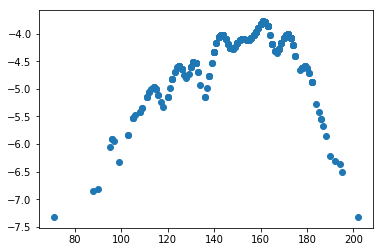

In [43]:
features = ['age','sex','cp','trestbps',
            'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

#bandwidth affects how 'smooth' the curve is
kde = KernelDensity(kernel='gaussian', bandwidth=2).fit(df_heart['thalach'].values.T.reshape(-1,1))
log_dens = kde.score_samples(df_heart['thalach'].values.T.reshape(-1,1))

plt.scatter(df_heart['thalach'],log_dens)
plt.show()

<h3>Kernel Density Estimation with Seaborn</h3>
kde is the "true" data distribution (blue line).I have assumed it is normally distributed (the black line). This is definitely not true for binomial data (e.g gender). But it is useful in showing how KDE may show several centroids in the data.

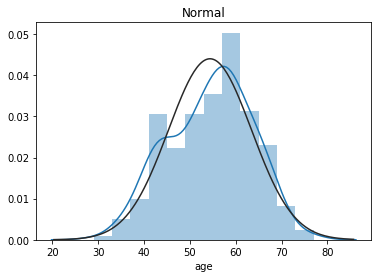

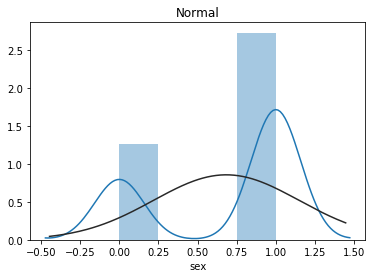

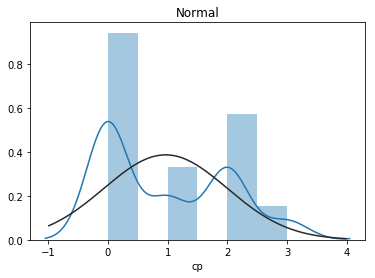

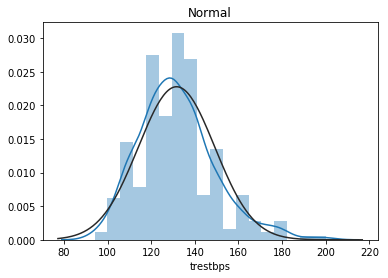

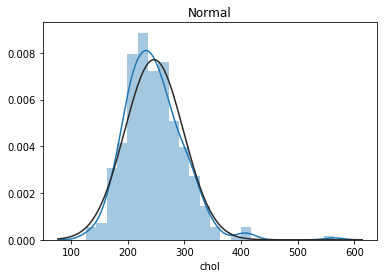

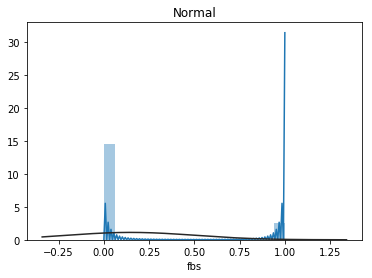

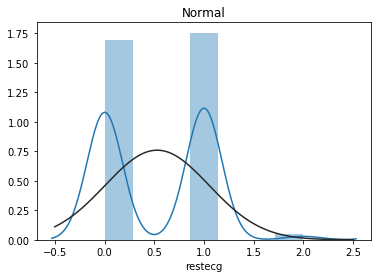

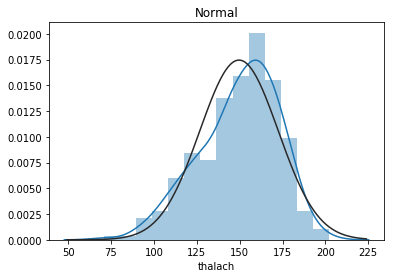

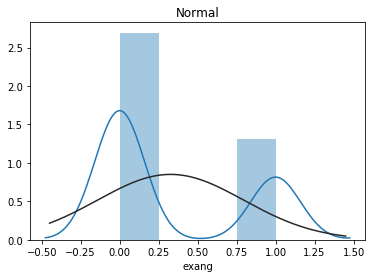

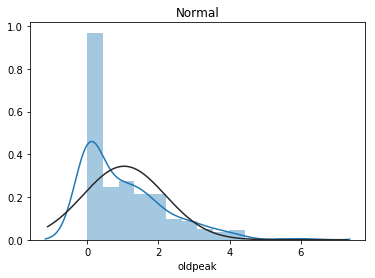

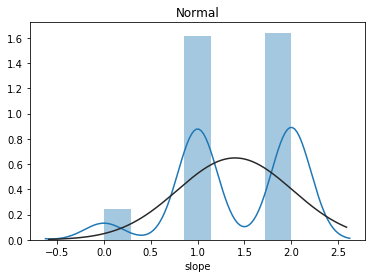

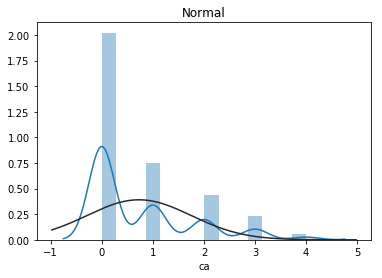

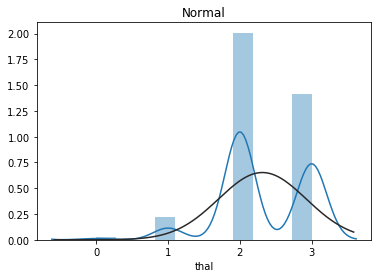

In [50]:
for feature in features:
    x = df_heart[feature]
    plt.figure(1); plt.title('Normal')
    sns.distplot(x, kde=True, fit=stats.norm)
    plt.show()

<b>Unrelated note on the benefits of Probability Density functions</b><br>
Normal PDF can gives the exact probability for a value on the real continuous number line. But perhaps it is more useful because it can give the probability of an outcome between two numbers on a real number line, or a number which is greater than or less than.